In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [40]:
x = np.linspace(0,1,50)
print(x)
y = x
def_metrics = np.stack((x, y), axis=1)
print(def_metrics.shape)
y_nan = y.copy()
y_nan[y_nan > 0.5] = np.float('Nan')
metrics_nan = np.stack((x, y_nan), axis=1)
print(metrics_nan[:, 1])
metrics_copy = metrics_nan.copy()

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
(50, 2)
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        na

In [49]:
indexes = list(range(len(metrics_copy)))
for i in indexes:
    # if def_metrics[i, 1] == -1:
    print(i)
    if math.isnan(metrics_copy[i, 1]):
        print(metrics_copy[i, 1])
        metrics_copy[i, 1] = 2*metrics_copy[i-1, 1] - metrics_copy[i-2, 1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
nan
28
nan
29
nan
30
nan
31
nan
32
nan
33
nan
34
nan
35
nan
36
nan
37
nan
38
nan
39
nan
40
nan
41
nan
42
nan
43
nan
44
nan
45
nan
46
nan
47
nan
48
nan
49
nan


mAP: 0.4897959183673469
mAP2: 0.4897959183673471
Image Saved!


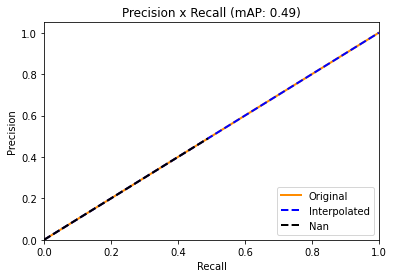

In [50]:
# Calculates mAP
Recall = def_metrics[:, 0]
Precision = def_metrics[:, 1]

DeltaR = Recall[1:]-Recall[:-1]
ap = np.sum(Precision[:-1]*DeltaR)
print('mAP:', ap)

Recall = metrics_copy[:, 0]
Precision = metrics_copy[:, 1]

DeltaR = Recall[1:]-Recall[:-1]
ap2 = np.sum(Precision[:-1]*DeltaR)
print('mAP2:', ap2)
print('Image Saved!')

fig_pr = plt.figure()

# Precision x Recall curve
# plt.plot(recall, prec, color='darkorange', lw=2)
plt.plot(def_metrics[:, 0], def_metrics[:, 1], color='darkorange', lw=2)
plt.plot(metrics_copy[:, 0], metrics_copy[:, 1], color='blue', lw=2, linestyle='--')
plt.plot(metrics_nan[:, 0], metrics_nan[:, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision x Recall (mAP: {ap:.2f})')
plt.legend(['Original', 'Interpolated', 'Nan'], loc="lower right")

In [51]:
for i in range(9):
    print(i)

0
1
2
3
4
5
6
7
8
